**Connect with google drive**

**Step_1: Get the data of 20 companies from yahoo web and store in google drive**

In [48]:
from pandas_datareader import data as pdr
from datetime import date
import yfinance as yf
import pandas as pd
import datetime

In [49]:

yf.pdr_override()


#datetime is a Python module


# Set the start and end date
start_date = '2011-01-01'

# Get data to today
today = datetime.datetime.today()

# Set the list including 20'str' acronym of 20 companies
list = ['INTC','AMD', 'CSCO', 'AAPL', 'MU', 'NVDA', 'QCOM', 'AMZN', 'NFLX', 'FB', 'GOOG', 'BABA', 'EBAY', 'IBM', 'XLNX', 'TXN', 'NOK', 'TSLA', 'MSFT', 'SNPS']

# Get the data
files=[]

# Create a data folder in my google drive.
def SaveData(df, filename):
  df.to_csv('Dataset/'+filename+'.csv')

def GetData(acronym):
  print (acronym)
  data = pdr.get_data_yahoo(acronym, start = start_date, end = today )
  dataname= acronym
  files.append(dataname)
  SaveData(data, dataname)

print("Today is " + str(today))
#Get data, and save that data as "str".csv
for i in list:
  GetData(i)
  

Today is 2021-07-17 19:19:18.878745
INTC
[*********************100%***********************]  1 of 1 completed
AMD
[*********************100%***********************]  1 of 1 completed
CSCO
[*********************100%***********************]  1 of 1 completed
AAPL
[*********************100%***********************]  1 of 1 completed
MU
[*********************100%***********************]  1 of 1 completed
NVDA
[*********************100%***********************]  1 of 1 completed
QCOM
[*********************100%***********************]  1 of 1 completed
AMZN
[*********************100%***********************]  1 of 1 completed
NFLX
[*********************100%***********************]  1 of 1 completed
FB
[*********************100%***********************]  1 of 1 completed
GOOG
[*********************100%***********************]  1 of 1 completed
BABA
[*********************100%***********************]  1 of 1 completed
EBAY
[*********************100%***********************]  1 of 1 completed
IBM
[**

### Requirement: 
30 ngày liên tiếp là input đầu vào của cột Adj => Predict ra cho ngày 31 

In [50]:
df = pd.read_csv("Dataset/AAPL.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-12-31,11.533929,11.552857,11.475357,11.520000,9.906079,193508000
1,2011-01-03,11.630000,11.795000,11.601429,11.770357,10.121364,445138400
2,2011-01-04,11.872857,11.875000,11.719643,11.831786,10.174186,309080800
3,2011-01-05,11.769643,11.940714,11.767857,11.928571,10.257413,255519600
4,2011-01-06,11.954286,11.973214,11.889286,11.918929,10.249121,300428800
...,...,...,...,...,...,...,...
2648,2021-07-12,146.210007,146.320007,144.000000,144.500000,144.500000,76299700
2649,2021-07-13,144.029999,147.460007,143.630005,145.639999,145.639999,100698900
2650,2021-07-14,148.100006,149.570007,147.679993,149.149994,149.149994,127050800
2651,2021-07-15,149.240005,150.000000,147.089996,148.479996,148.479996,106820300


In [51]:
df = df.reset_index()['Adj Close']
df

0         9.906079
1        10.121364
2        10.174186
3        10.257413
4        10.249121
           ...    
2648    144.500000
2649    145.639999
2650    149.149994
2651    148.479996
2652    146.389999
Name: Adj Close, Length: 2653, dtype: float64

In [52]:
# LSTM are sensitive to the scale of the data. so we apply MinMax scaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(np.array(df).reshape(-1,1))

In [53]:
print(df)

[[0.00159427]
 [0.0031379 ]
 [0.00351664]
 ...
 [1.        ]
 [0.99519598]
 [0.98021031]]


In [54]:
#splitting dataset into train and test split
training_size = int(len(df)*0.7)
test_size = len(df)-training_size
train_data, test_data = df[0:training_size, :], df[training_size:len(df), :1]
training_size, test_size

(1857, 796)

In [55]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [56]:
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [57]:
X_train.shape

(1826, 30)

In [58]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [59]:
X_train.shape

(1826, 30, 1)

**Step_2: Working with LSTM model**

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import numpy as np
import tensorflow as tf

In [61]:
model = Sequential()
model.add(LSTM(15, return_sequences=True,input_shape=(30,1)))
model.add(LSTM(15, return_sequences=True))
model.add(LSTM(15))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [62]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 30, 15)            1020      
_________________________________________________________________
lstm_7 (LSTM)                (None, 30, 15)            1860      
_________________________________________________________________
lstm_8 (LSTM)                (None, 15)                1860      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
Total params: 4,756
Trainable params: 4,756
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.fit(X_train, y_train, validation_data = (X_test, ytest), epochs=500, batch_size=64, verbose=1)

Epoch 1/500
29/29 [==============================] - 5s 53ms/step - loss: 0.0032 - val_loss: 0.0691
Epoch 2/500
29/29 [==============================] - 1s 24ms/step - loss: 2.0299e-04 - val_loss: 0.0337
Epoch 3/500
29/29 [==============================] - 1s 25ms/step - loss: 8.5268e-05 - val_loss: 0.0297
Epoch 4/500
29/29 [==============================] - 1s 24ms/step - loss: 7.7707e-05 - val_loss: 0.0301
Epoch 5/500
29/29 [==============================] - 1s 25ms/step - loss: 7.6070e-05 - val_loss: 0.0309
Epoch 6/500
29/29 [==============================] - 1s 24ms/step - loss: 7.7336e-05 - val_loss: 0.0295e
Epoch 7/500
29/29 [==============================] - 1s 24ms/step - loss: 7.9608e-05 - val_loss: 0.0302
Epoch 8/500
29/29 [==============================] - 1s 24ms/step - loss: 7.6434e-05 - val_loss: 0.0320
Epoch 9/500
29/29 [==============================] - 1s 26ms/step - loss: 7.3878e-05 - val_loss: 0.0292
Epoch 10/500
29/29 [==============================] - 1s 24ms/step 

29/29 [==============================] - 1s 26ms/step - loss: 3.3298e-05 - val_loss: 0.0084
Epoch 80/500
29/29 [==============================] - 1s 26ms/step - loss: 3.4971e-05 - val_loss: 0.0064
Epoch 81/500
29/29 [==============================] - 1s 26ms/step - loss: 3.2093e-05 - val_loss: 0.0059
Epoch 82/500
29/29 [==============================] - 1s 26ms/step - loss: 3.1669e-05 - val_loss: 0.0073
Epoch 83/500
29/29 [==============================] - 1s 28ms/step - loss: 3.4076e-05 - val_loss: 0.0077
Epoch 84/500
29/29 [==============================] - 1s 25ms/step - loss: 3.1060e-05 - val_loss: 0.0063
Epoch 85/500
29/29 [==============================] - 1s 26ms/step - loss: 3.0053e-05 - val_loss: 0.0075
Epoch 86/500
29/29 [==============================] - 1s 26ms/step - loss: 3.0781e-05 - val_loss: 0.0071
Epoch 87/500
29/29 [==============================] - 1s 27ms/step - loss: 2.9990e-05 - val_loss: 0.0063
Epoch 88/500
29/29 [==============================] - 1s 25ms/step -

29/29 [==============================] - 1s 22ms/step - loss: 1.3669e-05 - val_loss: 0.0026
Epoch 157/500
29/29 [==============================] - 1s 23ms/step - loss: 1.3680e-05 - val_loss: 0.0033
Epoch 158/500
29/29 [==============================] - 1s 23ms/step - loss: 1.4410e-05 - val_loss: 0.0033
Epoch 159/500
29/29 [==============================] - 1s 24ms/step - loss: 1.9832e-05 - val_loss: 0.0042
Epoch 160/500
29/29 [==============================] - 1s 24ms/step - loss: 1.3045e-05 - val_loss: 0.0033
Epoch 161/500
29/29 [==============================] - 1s 24ms/step - loss: 1.2885e-05 - val_loss: 0.0039
Epoch 162/500
29/29 [==============================] - 1s 23ms/step - loss: 1.2756e-05 - val_loss: 0.0040
Epoch 163/500
29/29 [==============================] - 1s 24ms/step - loss: 1.4439e-05 - val_loss: 0.0035
Epoch 164/500
29/29 [==============================] - 1s 24ms/step - loss: 1.2189e-05 - val_loss: 0.0036
Epoch 165/500
29/29 [==============================] - 1s 24

29/29 [==============================] - 1s 23ms/step - loss: 9.1801e-06 - val_loss: 0.0031
Epoch 234/500
29/29 [==============================] - 1s 22ms/step - loss: 8.2558e-06 - val_loss: 0.0031
Epoch 235/500
29/29 [==============================] - 1s 24ms/step - loss: 8.7399e-06 - val_loss: 0.0030
Epoch 236/500
29/29 [==============================] - 1s 23ms/step - loss: 8.1466e-06 - val_loss: 0.0022
Epoch 237/500
29/29 [==============================] - 1s 24ms/step - loss: 8.0731e-06 - val_loss: 0.0030
Epoch 238/500
29/29 [==============================] - 1s 22ms/step - loss: 8.4868e-06 - val_loss: 0.0028
Epoch 239/500
29/29 [==============================] - 1s 24ms/step - loss: 8.0642e-06 - val_loss: 0.0028
Epoch 240/500
29/29 [==============================] - 1s 24ms/step - loss: 8.5684e-06 - val_loss: 0.0028
Epoch 241/500
29/29 [==============================] - 1s 23ms/step - loss: 8.9000e-06 - val_loss: 0.0027
Epoch 242/500
29/29 [==============================] - 1s 21

29/29 [==============================] - 1s 23ms/step - loss: 8.4913e-06 - val_loss: 0.0025
Epoch 311/500
29/29 [==============================] - 1s 23ms/step - loss: 7.3716e-06 - val_loss: 0.0034
Epoch 312/500
29/29 [==============================] - 1s 23ms/step - loss: 8.3555e-06 - val_loss: 0.0026
Epoch 313/500
29/29 [==============================] - 1s 23ms/step - loss: 8.4052e-06 - val_loss: 0.0023
Epoch 314/500
29/29 [==============================] - 1s 23ms/step - loss: 7.6391e-06 - val_loss: 0.0024
Epoch 315/500
29/29 [==============================] - 1s 23ms/step - loss: 7.2028e-06 - val_loss: 0.0029
Epoch 316/500
29/29 [==============================] - 1s 24ms/step - loss: 8.1540e-06 - val_loss: 0.0029
Epoch 317/500
29/29 [==============================] - 1s 24ms/step - loss: 8.0495e-06 - val_loss: 0.0029
Epoch 318/500
29/29 [==============================] - 1s 23ms/step - loss: 7.5331e-06 - val_loss: 0.0028
Epoch 319/500
29/29 [==============================] - 1s 24

29/29 [==============================] - 1s 24ms/step - loss: 7.1891e-06 - val_loss: 0.0028
Epoch 388/500
29/29 [==============================] - 1s 24ms/step - loss: 8.0958e-06 - val_loss: 0.0025
Epoch 389/500
29/29 [==============================] - 1s 22ms/step - loss: 7.2903e-06 - val_loss: 0.0024
Epoch 390/500
29/29 [==============================] - 1s 24ms/step - loss: 7.3363e-06 - val_loss: 0.0024
Epoch 391/500
29/29 [==============================] - 1s 23ms/step - loss: 7.4637e-06 - val_loss: 0.0026
Epoch 392/500
29/29 [==============================] - 1s 23ms/step - loss: 7.4090e-06 - val_loss: 0.0023
Epoch 393/500
29/29 [==============================] - 1s 23ms/step - loss: 7.7650e-06 - val_loss: 0.0023
Epoch 394/500
29/29 [==============================] - 1s 23ms/step - loss: 7.8332e-06 - val_loss: 0.0028
Epoch 395/500
29/29 [==============================] - 1s 23ms/step - loss: 7.8066e-06 - val_loss: 0.0024
Epoch 396/500
29/29 [==============================] - 1s 24

29/29 [==============================] - 1s 21ms/step - loss: 7.0112e-06 - val_loss: 0.0025
Epoch 465/500
29/29 [==============================] - 1s 22ms/step - loss: 7.1739e-06 - val_loss: 0.0030
Epoch 466/500
29/29 [==============================] - 1s 23ms/step - loss: 8.0688e-06 - val_loss: 0.0027
Epoch 467/500
29/29 [==============================] - 1s 23ms/step - loss: 7.4083e-06 - val_loss: 0.0024
Epoch 468/500
29/29 [==============================] - 1s 24ms/step - loss: 7.3402e-06 - val_loss: 0.0027
Epoch 469/500
29/29 [==============================] - 1s 24ms/step - loss: 7.6742e-06 - val_loss: 0.0024
Epoch 470/500
29/29 [==============================] - 1s 22ms/step - loss: 7.0602e-06 - val_loss: 0.0024
Epoch 471/500
29/29 [==============================] - 1s 23ms/step - loss: 7.7434e-06 - val_loss: 0.0023
Epoch 472/500
29/29 [==============================] - 1s 22ms/step - loss: 7.7822e-06 - val_loss: 0.0027
Epoch 473/500
29/29 [==============================] - 1s 23

**Step_3: Get results**

In [64]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [65]:
#Transformback to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

**Step_4: Check**

In [66]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

24.2850406551548

In [67]:
math.sqrt(mean_squared_error(ytest, test_predict))

79.1097849598349

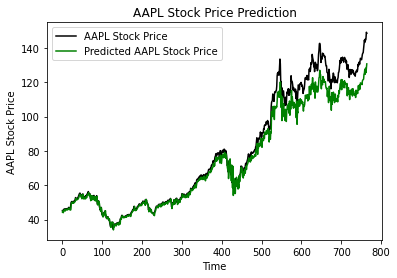

In [68]:
import matplotlib.pyplot as plt
plt.plot(scaler.inverse_transform(ytest.reshape(-1,1)), color = 'black', label = 'AAPL Stock Price')
plt.plot(test_predict, color = 'green', label = 'Predicted AAPL Stock Price')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AAPL Stock Price')
plt.legend()
plt.show()